<a href="https://colab.research.google.com/github/agord1994/MLA_ASG/blob/main/MLA2_ASG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Machine Learning Assignment #  
**Andrew Gordon**  

## Standard Imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## Imports for specific models
In this section, you will import the models from SKLearn that you will use this in this notebook. 

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

## Imports for Splitting Data and Building Pipeline


In [ ]:
from sklearn.model_selection import train_test_split
from matplotlib import test
from sklearn.pipeline import Pipeline
from sklearn import set_config
set_config(display='diagram')

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

# Imports for Performance Measures

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

## Confusion Matrix Function
This function is for creating a graphical version of the confusion matrix.



In [ ]:
def plot_cm(y_test, y_pred):
    cm = confusion_matrix(y_test,y_pred)
    fig = plt.figure(figsize=(10,10))
    heatmap = sns.heatmap(cm, annot=True, fmt='.2f', cmap='RdYlGn')
    plt.ylabel('True label')
    plt.xlabel('Predicted Label')

# ROC_Curve Function
This function is for plotting the roc_curve

In [ ]:
def plot_roc_curve(fpr,tpr):
  plt.plot(fpr, tpr, linewidth=2)
  plt.plot([0,1],[0,1], 'k--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.0])

## Problem 1

### Reading the Data

In [ ]:
df= pd.read_csv("/content/gdrive/MyDrive/CS430/Steel_industry_data.csv")

renaming columns  in data frame

In [ ]:
df=df.rename(columns={ 'Usage_kWh': 'usage_kwh','Lagging_Current_Reactive.Power_kVarh': 'lag_react_pwr_kvarh','Leading_Current_Reactive_Power_kVarh': 'lead_react_pwr_kvrah','Lagging_Current_Power_Factor': 'lag_current_pwr','Leading_Current_Power_Factor': 'lead_current_pwr','NSM': 'nsm','WeekStatus': 'week_status','Day_of_week': 'day_of_week','Load_Type':'load_type'})

### Statistical and Visual Exploration

summerizeing numerical columns of data

In [ ]:
df.describe()

,usage_kwh,lag_react_pwr_kvarh,lead_react_pwr_kvrah,CO2(tCO2),lag_current_pwr,lead_current_pwr,nsm
count,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000
mean,27.386892,13.035384,3.870949,0.011524,80.578056,84.367870,42750.000000
std,33.444380,16.306000,7.424463,0.016151,18.921322,30.456535,24940.534317
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.200000,2.300000,0.000000,0.000000,63.320000,99.700000,21375.000000
50%,4.570000,5.000000,0.000000,0.000000,87.960000,100.000000,42750.000000
75%,51.237500,22.640000,2.090000,0.020000,99.022500,100.000000,64125.000000
max,157.180000,96.910000,27.760000,0.070000,100.000000,100.000000,85500.000000


getting counts of different load types 

In [ ]:
numberofdaysperloadtype= df['day_of_week'].groupby(df['load_type']).count() #counts of different load types
numberofdaysperloadtype

load_type
Light_Load      18072
Maximum_Load     7272
Medium_Load      9696
Name: day_of_week, dtype: int64

In [ ]:
numberofdaysperloadtype.head()

load_type
Light_Load      18072
Maximum_Load     7272
Medium_Load      9696
Name: day_of_week, dtype: int64

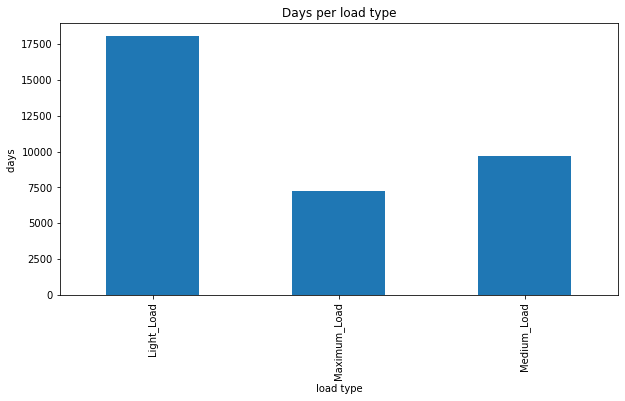

In [ ]:
numberofdaysperloadtype.plot(kind="bar", x="load_type",y="numberofdaysperloadtype",xlabel="load type", ylabel="days ", title="Days per load type",figsize=(10,5))

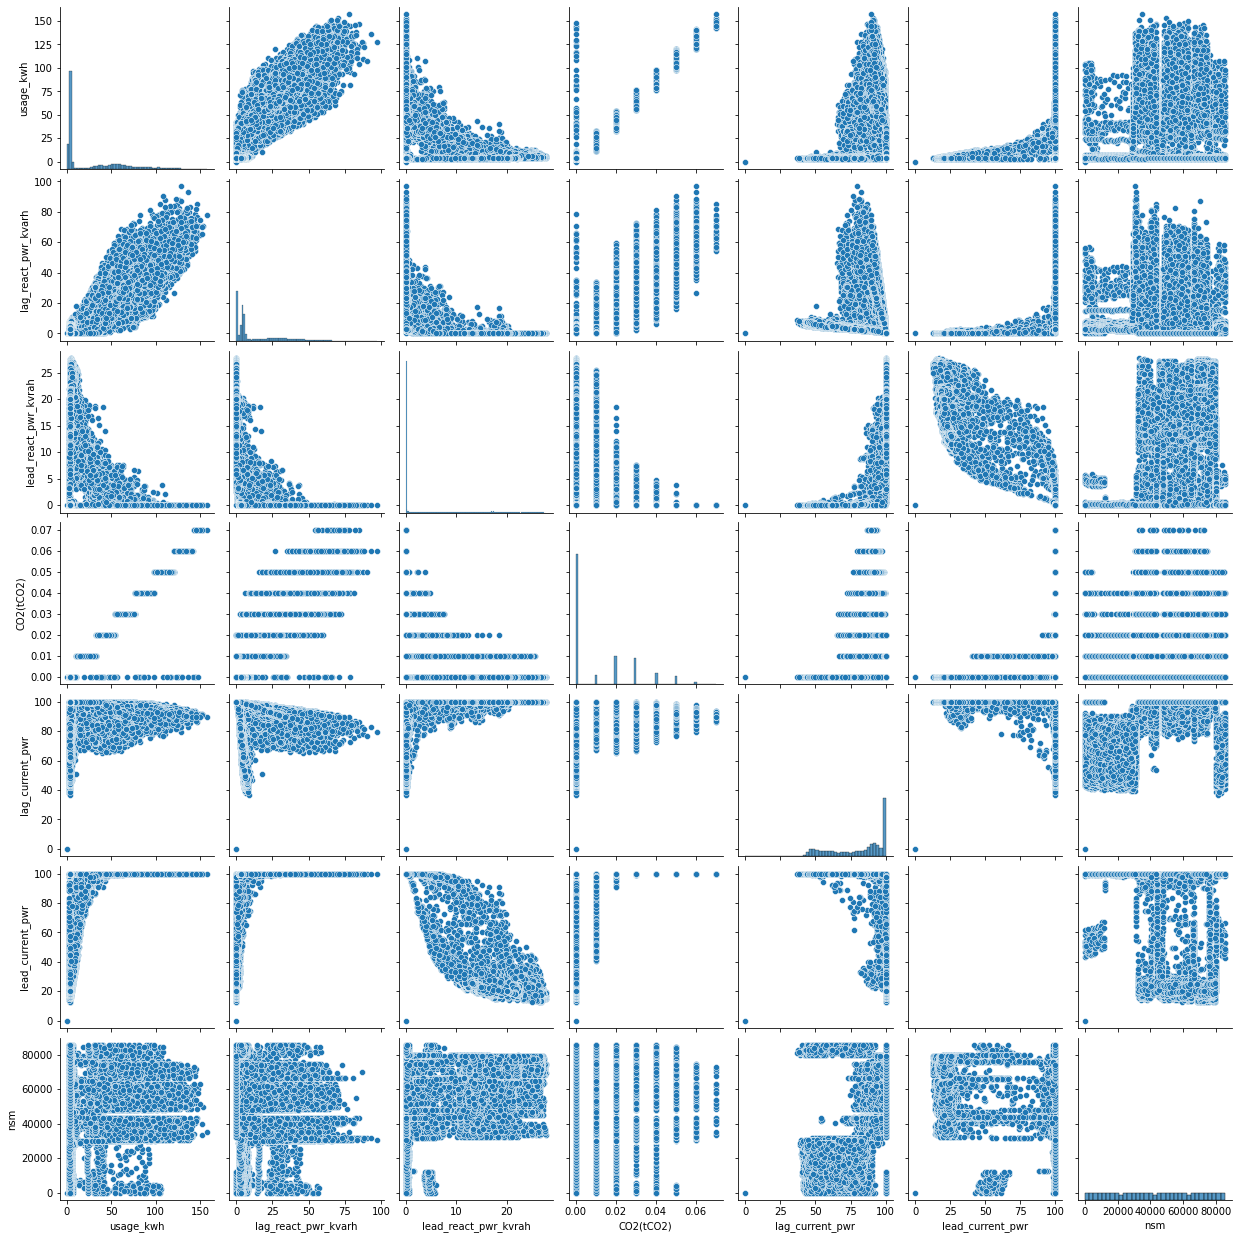

In [ ]:
sns.pairplot(df)

Visualization takeaways: It looks as though there are some variables that the data might be capped for some reason. For instance, if you look at lag_current_pwr, lead_current_pwr,lead_react_pwr these variables are max value only goes up to 100, thus the data is skewed more to more to the upper bounds. There could be a linear relationship between lag_react_pwr_kvarh /usage_kwh, lead_current_power/lead_react_pwr_krvah.

### Splitting Data into Train/Test

In [ ]:
X=df[['lag_react_pwr_kvarh','lead_react_pwr_kvrah','CO2(tCO2)','lag_current_pwr','lead_current_pwr','nsm','week_status','day_of_week','load_type']] #putting variables into X data frame
y=df['usage_kwh']# putting usage_kwh into y data frame- this is variable we are trying to predict




In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=.2,random_state=0)#splitting up data into 4 dataframes. test data frames will have 20% of data to check validity of training sets

### Building the Pipeline

In [ ]:
num_attribs= ['lag_react_pwr_kvarh','lead_react_pwr_kvrah','CO2(tCO2)','lag_current_pwr','lead_current_pwr','nsm']
cat_attribs= ['week_status','day_of_week','load_type']

In [ ]:
col_transform=ColumnTransformer(transformers=[('cat',OneHotEncoder(),cat_attribs),('num',MinMaxScaler(),num_attribs)], remainder='passthrough') #transforming categorical attributes to one hot encoder attributes, and numerical with minmax scaler

In [ ]:
col_transform

ColumnTransformer(remainder='passthrough',
                  transformers=[('cat', OneHotEncoder(),
                                 ['week_status', 'day_of_week', 'load_type']),
                                ('num', MinMaxScaler(),
                                 ['lag_react_pwr_kvarh', 'lead_react_pwr_kvrah',
                                  'CO2(tCO2)', 'lag_current_pwr',
                                  'lead_current_pwr', 'nsm'])])

In [ ]:

pipeline=Pipeline([('transform',col_transform), 
                   ('mlr_model',LinearRegression())
                   ]) #creating a data pipeline with the transformations made

In [ ]:
set_config(display='diagram')
pipeline

Pipeline(steps=[('transform',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat', OneHotEncoder(),
                                                  ['week_status', 'day_of_week',
                                                   'load_type']),
                                                 ('num', MinMaxScaler(),
                                                  ['lag_react_pwr_kvarh',
                                                   'lead_react_pwr_kvrah',
                                                   'CO2(tCO2)',
                                                   'lag_current_pwr',
                                                   'lead_current_pwr',
                                                   'nsm'])])),
                ('mlr_model', LinearRegression())])

### Executing the Model

In [ ]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('transform',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat', OneHotEncoder(),
                                                  ['week_status', 'day_of_week',
                                                   'load_type']),
                                                 ('num', MinMaxScaler(),
                                                  ['lag_react_pwr_kvarh',
                                                   'lead_react_pwr_kvrah',
                                                   'CO2(tCO2)',
                                                   'lag_current_pwr',
                                                   'lead_current_pwr',
                                                   'nsm'])])),
                ('mlr_model', LinearRegression())])

### Evaluating Model

In [ ]:
y_pred= pipeline.predict(X_test) 

In [ ]:

y_train_pred= pipeline.predict(X_train)
y_test_pred=pipeline.predict(X_test)

print(mean_squared_error(y_train,y_train_pred)**(.5)) 
print(mean_squared_error(y_test,y_test_pred)**(.5))


4.582075664388731
5.051067083537763


This is root square mean error- the output of the training model is 4.58 and the output of the testing model shows 5.04, thus this shows the model is relatively consistent. Could be better though. 

In [ ]:
pipeline.score(X_test, y_test)

0.9768484123511567

R^2 measures shows us that this model captures 97% of variation which is great

In [ ]:
pipeline.named_steps['mlr_model'].intercept_

306341947202878.25

In [ ]:
pipeline.named_steps['mlr_model'].coef_

array([-3.16633803e+13, -3.84634502e+13, -7.31754379e+13, -7.31754379e+13,
       -6.63753679e+13, -6.63753679e+13, -7.31754379e+13, -7.31754379e+13,
       -7.31754379e+13, -2.01503129e+14, -2.01503129e+14, -2.01503129e+14,
        2.90178342e+01,  1.88471277e+00,  1.17520222e+02,  6.99101919e+00,
        4.70773218e+00, -3.12490463e-01])

### Conclusion
The the prediction variables multiple linear regression model account for 97% of the variation of test variables, therefore the model is a good gauge of predicting kwh usage

## Problem 2

### Reading the Data

In [ ]:
df['week_status']=df['week_status'].apply(lambda x: 1 if x=="Weekday" else 0)# if value in the row is yes, recode to 1, otherwise recode to 0

In [ ]:
df

,date,usage_kwh,lag_react_pwr_kvarh,lead_react_pwr_kvrah,CO2(tCO2),lag_current_pwr,lead_current_pwr,nsm,week_status,day_of_week,load_type
0,1/1/2018 0:15,3.17,2.95,0.00,0.0,73.21,100.00,900,1,Monday,Light_Load
1,1/1/2018 0:30,4.00,4.46,0.00,0.0,66.77,100.00,1800,1,Monday,Light_Load
2,1/1/2018 0:45,3.24,3.28,0.00,0.0,70.28,100.00,2700,1,Monday,Light_Load
3,1/1/2018 1:00,3.31,3.56,0.00,0.0,68.09,100.00,3600,1,Monday,Light_Load
4,1/1/2018 1:15,3.82,4.50,0.00,0.0,64.72,100.00,4500,1,Monday,Light_Load
...,...,...,...,...,...,...,...,...,...,...,...
35035,31/12/2018 23:00,3.85,4.86,0.00,0.0,62.10,100.00,82800,1,Monday,Light_Load
35036,31/12/2018 23:15,3.74,3.74,0.00,0.0,70.71,100.00,83700,1,Monday,Light_Load
35037,31/12/2018 23:30,3.78,3.17,0.07,0.0,76.62,99.98,84600,1,Monday,Light_Load
35038,31/12/2018 23:45,3.78,3.06,0.11,0.0,77.72,99.96,85500,1,Monday,Light_Load


### Splitting Data into Train/Test

In [ ]:
X= df[['lag_react_pwr_kvarh','lead_react_pwr_kvrah','CO2(tCO2)','lag_current_pwr','lead_current_pwr', 'usage_kwh','nsm','load_type']]


In [ ]:
y=df[['week_status']]

In [ ]:
df.week_status.groupby(df.week_status).count()

week_status
0     9984
1    25056
Name: week_status, dtype: int64

In [ ]:
X_train,X_test,y_train,y_test= train_test_split(X,y, test_size=.20, random_state=0)

### Building the Pipeline

In [ ]:
num_attribs=['lag_react_pwr_kvarh','lead_react_pwr_kvrah','CO2(tCO2)','lag_current_pwr','lead_current_pwr','usage_kwh','nsm']
cat_attribs=['load_type']


In [ ]:
col_transform=ColumnTransformer(transformers=[('cat',OneHotEncoder(),cat_attribs),('num',MinMaxScaler(),num_attribs)]) #transforming categorical attributes to one hot encoder attributes, and numerical with minmax scaler

In [ ]:
col_transform

ColumnTransformer(transformers=[('cat', OneHotEncoder(), ['load_type']),
                                ('num', MinMaxScaler(),
                                 ['lag_react_pwr_kvarh', 'lead_react_pwr_kvrah',
                                  'CO2(tCO2)', 'lag_current_pwr',
                                  'lead_current_pwr', 'usage_kwh', 'nsm'])])

In [ ]:
pipeline=Pipeline ([
                    ('trans', col_transform), 
                    ('mlr', LogisticRegression(max_iter=1000))
                    ])

In [ ]:
from sklearn import set_config
set_config(display='diagram')
pipeline

Pipeline(steps=[('trans',
                 ColumnTransformer(transformers=[('cat', OneHotEncoder(),
                                                  ['load_type']),
                                                 ('num', MinMaxScaler(),
                                                  ['lag_react_pwr_kvarh',
                                                   'lead_react_pwr_kvrah',
                                                   'CO2(tCO2)',
                                                   'lag_current_pwr',
                                                   'lead_current_pwr',
                                                   'usage_kwh', 'nsm'])])),
                ('mlr', LogisticRegression(max_iter=1000))])

### Executing the Model

In [ ]:
pipeline.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(steps=[('trans',
                 ColumnTransformer(transformers=[('cat', OneHotEncoder(),
                                                  ['load_type']),
                                                 ('num', MinMaxScaler(),
                                                  ['lag_react_pwr_kvarh',
                                                   'lead_react_pwr_kvrah',
                                                   'CO2(tCO2)',
                                                   'lag_current_pwr',
                                                   'lead_current_pwr',
                                                   'usage_kwh', 'nsm'])])),
                ('mlr', LogisticRegression(max_iter=1000))])

### Evaluating Model

In [ ]:
y_pred=pipeline.predict(X_test)

In [ ]:
from seaborn.matrix import heatmap
def plot_cm (y_test,y_pred):
    cm=confusion_matrix(y_test,y_pred)
    fig = plt.figure(figsize=(10,10))
    heatmap= sns.heatmap (cm, annot=True, fmt='.2f',cmap="RdYlGn")
    plt.ylabel ('true label')
    plt.xlabel ('predicted label')

In [ ]:
def plot_roc_curve(fpr,tpr):
  plt.plot(fpr,tpr,linewidth=2)
  plt.plot([0,1],[0,1],'k--')
  plt.xlim([0.0,1.0])
  plt.ylim([0.0,1.0])

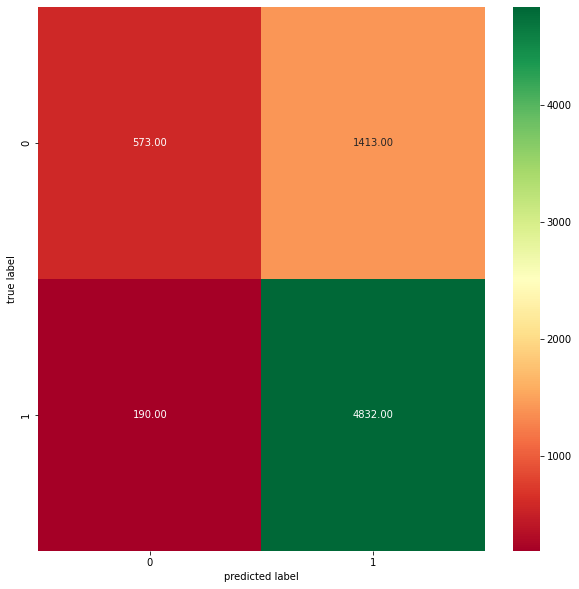

In [ ]:
plot_cm(y_test,y_pred) # y_testy_pred = what was predicted when we passed X_text through algorithm. y_test= true positives


1=weekday 
0=weekend

0,0= true positive
1,0= false negative
0,1= false positive
1,1= true negative

precision= fraction of classifications that were correct out of all predictions
recall= fraction of classifications that were correct out of all possible
f-1 score= harmonic mean of precision and recall

In [ ]:
print(precision_score(y_test,y_pred))
print(recall_score(y_test,y_pred))
print(f1_score(y_test,y_pred))

0.7737389911929544
0.9621664675428117
0.8577261027780244


In [ ]:
y_pred_proba= pipeline.predict_proba(X_test)

0.7724291064933627


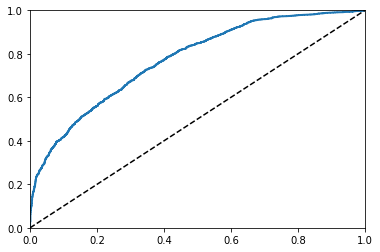

In [ ]:
y_pred_proba= pipeline.predict_proba(X_test)[:,1]
fpr,tpr, _= roc_curve(y_test,y_pred_proba)
plot_roc_curve(fpr,tpr)
print(roc_auc_score(y_test,y_pred_proba))

examining the precision scores and recall score are relatively high. The recall score is higher than the precision score. 

This model is suitable for predicting the week_status considering the high roc score, precision, and recall scores are all relatively high.